In [10]:
import csv
import matplotlib.pyplot as plt

In [11]:
def import_csv(path):
    with open(path, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        milliseconds = float(reader.__next__()[0])
        rows = int(reader.__next__()[0])
        columns = int(reader.__next__()[0])
        nnz = int(reader.__next__()[0])
        try:
            buffer_size = int(reader.__next__()[0])  # Bytes
        except:
            buffer_size = 0
        
    return milliseconds, rows, columns, nnz, buffer_size

In [12]:
execution_times_cusparse = []
nnz_array = []
buffer_array = []
row_array = []
column_array = []

for i in range(1, 11):
    ms, rows, columns, nnz, bf = import_csv(f'../output/csr_cusparse_{i}.csv')
    execution_times_cusparse.append(ms)
    nnz_array.append(nnz)
    buffer_array.append(bf)
    row_array.append(rows)
    column_array.append(columns)

print(execution_times_cusparse)
print(nnz_array)
print(buffer_array)
print(row_array)
print(column_array)

[0.0511322, 0.063017, 0.0453856, 0.109874, 0.0488784, 0.0599405, 0.0452778, 0.0537533, 0.0481322, 0.0488886]
[3802, 998, 4282, 9613, 1726, 1677, 1041, 2400, 2480, 2934]
[31441, 9009, 35281, 158823, 14833, 17547, 11339, 20225, 20865, 24497]
[822, 183, 541, 1224, 663, 1096, 638, 600, 512, 768]
[822, 183, 541, 1224, 663, 1096, 638, 600, 512, 768]


In [13]:
execution_times_coo = []
for i in range(1, 11):
    ms, rows, columns, nnz, _ = import_csv(f'../output/csr_coo_own_{i}.csv')
    execution_times_coo.append(ms)
    
print(execution_times_coo)

[1.0283, 0.207258, 0.864563, 4.39071, 0.429978, 0.828928, 0.257638, 0.520602, 0.498995, 0.730624]


In [14]:
execution_times_csc = []
for i in range(1, 11):
    ms, rows, columns, nnz, _ = import_csv(f'../output/csr_csc_own_{i}.csv')
    execution_times_csc.append(ms)
    
print(execution_times_csc)

[1.60206, 0.207544, 1.12673, 5.92377, 0.485369, 0.853476, 0.303873, 0.781722, 0.623027, 0.941711]


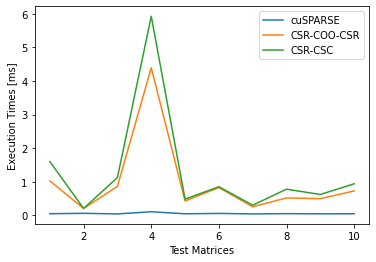

In [15]:
plt.figure()
plt.xlabel("Test Matrices")
plt.ylabel("Execution Times [ms]")
plt.plot(range(1, 11), execution_times_cusparse, label="cuSPARSE")
plt.plot(range(1, 11), execution_times_coo, label="CSR-COO-CSR")
plt.plot(range(1, 11), execution_times_csc, label="CSR-CSC")
plt.legend()

In [16]:
def effective_bandwidth(time, bytes):
    time *= 1e-3  # ms to s
    return ((bytes) / 1e9) / time

In [17]:
eb_cusparse = []
eb_coo = []
eb_csc = []

for i in range(0, 10):
    bytes = row_array[i] * column_array[i] * 4 * 2
    eb_cusparse.append(effective_bandwidth(execution_times_cusparse[i], bytes))
    eb_coo.append(effective_bandwidth(execution_times_coo[i], bytes))
    eb_csc.append(effective_bandwidth(execution_times_csc[i], bytes))
    
print(eb_cusparse)
print(eb_coo)
print(eb_csc)

[105.71561560034576, 4.251424218861576, 51.59010787562575, 109.0832043977647, 71.9449081803005, 160.32111844245543, 71.91939537698386, 53.5781059023353, 43.570665791299795, 96.51722487451062]
[5.256707186618691, 1.292649740902643, 2.7082445119673175, 2.729719794748457, 8.178446339115025, 11.592958616429893, 12.639253526265538, 5.532057118489749, 4.2027515305764584, 6.458304134548002]
[3.3740758773079658, 1.2908684423543921, 2.0780914682310754, 2.0232736922601653, 7.245110421143502, 11.259517549409708, 10.716161027797797, 3.6841741693338554, 3.366069207273521, 5.010658259274873]


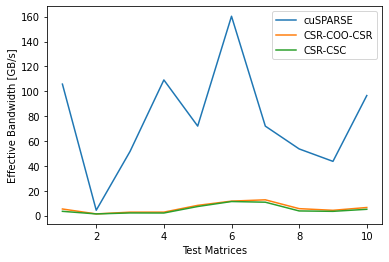

In [18]:
plt.figure()
plt.xlabel("Test Matrices")
plt.ylabel("Effective Bandwidth [GB/s]")
plt.plot(range(1, 11), eb_cusparse, label="cuSPARSE")
plt.plot(range(1, 11), eb_coo, label="CSR-COO-CSR")
plt.plot(range(1, 11), eb_csc, label="CSR-CSC")
#plt.plot(range(1, 11), [933]*10, label="Max. Bandwidth")
plt.legend()